# Análise dos dados da Lotofacil

Importando as biblioetecas

In [188]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

In [62]:
#Leitura do dataset
loto = pd.read_html('D_LOTFAC.HTM')[0]

In [63]:
#Retira linhas em branco
loto.dropna(thresh=15, inplace=True)

In [64]:
type(loto)

pandas.core.frame.DataFrame

In [65]:
ltframe = loto.ix[:, : 16]

c:\users\lucas_silma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [66]:
#ajusta colunas
ltframe.columns = [
'Concurso', 'Data Sorteio', 'Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6', 'Bola7', 'Bola8', 'Bola9', 'Bola10', 'Bola11', 'Bola12', 'Bola13', 'Bola14','Bola15'
]

In [67]:
ltframe.drop(0, inplace=True)

c:\users\lucas_silma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
#Variavel para buscar apenas os valores sorteados ignorando data e etc
bolas = ['Bola%s' % i for i in range(1,16)] 


In [69]:
ltframe[bolas] = ltframe[bolas].apply(pd.to_numeric)

c:\users\lucas_silma\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [85]:
#Cria colina de soma para analise
ltframe['Soma'] = ltframe[bolas].sum(axis=1)

c:\users\lucas_silma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
x = ltframe['Data Sorteio']
y = ltframe['Soma']


# Plotando a soma dos sorteios para verificar a frequencia

c:\users\lucas_silma\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


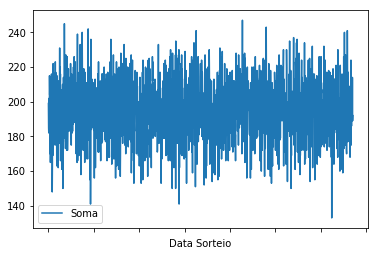

In [238]:
ltframe.plot(x = ltframe['Data Sorteio'], y=['Soma'])

Percebemos que a soma do sorteio mais frenquente é entre 200 e 220, mais ou menos

# Numeros mais frequentes

Vamos verificar o números mais sorteados na Lotofácil

In [241]:
freq = pd.Series(Counter(ltframe[bolas].values.flatten()).most_common())
freq

0     (11, 1040)
1     (13, 1039)
2     (24, 1035)
3      (2, 1028)
4     (10, 1023)
5     (20, 1022)
6      (3, 1020)
7     (14, 1019)
8      (4, 1018)
9     (25, 1017)
10     (1, 1015)
11     (5, 1007)
12    (22, 1007)
13    (23, 1006)
14    (12, 1004)
15    (17, 1004)
16    (18, 1002)
17    (15, 1001)
18      (9, 998)
19     (19, 998)
20     (21, 995)
21      (7, 983)
22      (6, 980)
23      (8, 955)
24     (16, 954)
dtype: object

O número 11 é o numero mais sorteado de todos os tempos. Enquanto o número 16 é o menos frequente em todos os sorteios.

Agora, vamos verificar os numeros mais frequentes considerando apenas os últimos 10 sorteios.

In [243]:
#Busca ultimos 10 sorteios
freq_dez = ltframe[bolas].tail(10)
freq_dez

,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,Bola9,Bola10,Bola11,Bola12,Bola13,Bola14,Bola15
6825,1,8,3,16,5,9,17,7,2,25,6,21,20,12,23
6827,1,13,22,20,14,4,3,16,25,17,2,21,23,11,7
6830,9,15,12,18,8,5,19,4,21,14,25,22,3,10,1
6833,22,18,11,17,25,9,6,8,3,2,5,23,21,24,20
6835,11,9,2,17,5,20,7,1,25,12,24,19,15,4,23
6841,24,9,10,1,5,15,19,21,20,11,2,23,12,4,22
6843,5,14,3,22,7,25,9,21,19,8,2,20,1,23,12
6844,10,25,23,13,8,18,16,3,20,15,9,12,4,14,24
6848,12,9,14,19,17,22,6,16,15,20,11,1,4,18,5
6852,4,16,5,23,6,9,1,24,14,19,8,3,18,20,22


Numeros mais sorteados nos ultimos 10 sorteios

In [245]:
fqd = pd.Series(Counter(freq_dez.values.flatten()).most_common(25))
fqd

0      (9, 9)
1     (20, 9)
2      (1, 8)
3      (5, 8)
4     (23, 8)
5      (3, 7)
6     (25, 7)
7     (12, 7)
8     (22, 7)
9      (4, 7)
10     (8, 6)
11     (2, 6)
12    (21, 6)
13    (14, 6)
14    (19, 6)
15    (16, 5)
16    (17, 5)
17    (11, 5)
18    (15, 5)
19    (18, 5)
20    (24, 5)
21     (7, 4)
22     (6, 4)
23    (10, 3)
24    (13, 2)
dtype: object